<a href="https://colab.research.google.com/github/Sayandip05/PlantDocBot/blob/main/AI_PlantDocBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI PlantDocBot


In [1]:
#Import and folder creation
import os
#create project folder
base = "/content/PlantDocBot"
os.makedirs(os.path.join(base,"data","plantvillage"), exist_ok = True)
os.makedirs(os.path.join(base,"data", "plantdoc"), exist_ok = True)
os.makedirs(os.path.join(base,"data", "text_corpus"), exist_ok = True)

print("Folder created under", base)


Folder created under /content/PlantDocBot


In [2]:
#Download Dataset via git clone
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git "{base}/data/plantvillage"
!git clone https://github.com/pratikkayal/PlantDoc-Dataset.git "{base}/data/plantdoc"
print ("Done")

Cloning into '/content/PlantDocBot/data/plantvillage'...
remote: Enumerating objects: 163235, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163235 (delta 2), reused 1 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163235/163235), 2.00 GiB | 41.90 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Updating files: 100% (182401/182401), done.
Cloning into '/content/PlantDocBot/data/plantdoc'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 2670 (delta 22), reused 22 (delta 22), pack-reused 2635 (from 1)
Receiving objects: 100% (2670/2670), 932.92 MiB | 51.30 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (2581/2581), done.
Done


In [3]:
# Verify Dataset directories and list top-level content
for sub in ["plantvillage", "plantdoc"]:
    path = os.path.join(base, "data", sub)
    print("\nContents of", sub, ":")
    print(os.listdir(path)[:20])


Contents of plantvillage :
['slurm-476487.out', 'utils', 'slurm-476480.out', 'generate_data_grayscale-50-50.sh', 'generate_mapstring.py', 'generate_data_segmented-80-20.sh', 'create_data_distribution.py', 'slurm-476483.out', 'leaf_grouping', 'slurm-476490.out', 'generate_data_grayscale-80-20.sh', 'generate_data_segmented-40-60.sh', 'generate_data_for_SVM.py', 'generate_data_segmented-20-80.sh', 'generate_data_color-40-60.sh', 'generate_data_color-60-40.sh', 'generate_data_grayscale-60-40.sh', 'run_all.sh', 'slurm-476492.out', 'generate_data_segmented-60-40.sh']

Contents of plantdoc :
['PlantDoc_Examples.png', 'train', '.git', 'test', 'README.md', 'LICENSE.txt']


In [4]:
# Search for image directories inside PlantVillage
import os

pv_base = os.path.join(base, "data", "plantvillage")
img_exts = ('.jpg', '.jpeg', '.png', '.bmp')

found_dirs = []   # FIXED: missing '='

for root_dir, dirs, files in os.walk(pv_base):

    # FIXED: endswitch → endswith
    count = sum(1 for f in files if f.lower().endswith(img_exts))

    if count > 0:
        found_dirs.append((root_dir, count))

if not found_dirs:
    print("No image files found inside PlantVillage Folder.")
else:
    print("Found image directories.\nSample list (first 10):")
    for d, c in found_dirs[:10]:
        print(" ", d, "-", c, "images")

    # Choose first as img_root
    img_root = found_dirs[0][0]
    print("Using image root:", img_root)


Found image directories.
Sample list (first 10):
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/30 - 291 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/11 - 187 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/31 - 146 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/28 - 297 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/9 - 132 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/26 - 187 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/27 - 84 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/20 - 153 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/36 - 65 images
  /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/34 - 211 images
Using image root: /content/PlantDocBot/data/plantvillage/data_di

Displaying color image: /content/PlantDocBot/data/plantvillage/data_distribution_for_SVM/train/30/7161cda9-c525-437a-bcaf-ebac2b7e3523.JPG
Original image mode: RGB


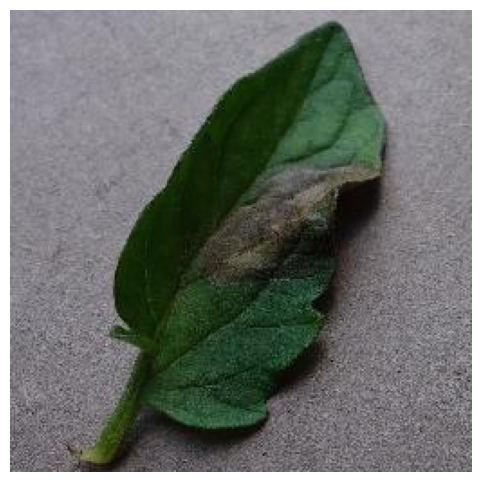

In [5]:
#Robust Colour display
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import numpy as np

#use img_root from previous cell
if 'img_root' in globals():
    sample_file = None
    for root_dir, dirs, files in os.walk(img_root):
        img_files = [f for f in files if f.lower().endswith(img_exts)]
        if img_files:
            sample_file = os.path.join(root_dir, random.choice(img_files))
            break

    if sample_file:
        print("Displaying color image:", sample_file)
        img = Image.open(sample_file)

        #Check mode
        print("Original image mode:", img.mode)

        #Convert to true RGB if not already
        if img.mode != 'RGB':
            img = img.convert('RGB')

        #Use Numpy+matplotlib to ensure correct color display
        plt.figure(figsize=(6,6))
        plt.imshow(np.asarray(img))
        plt.axis('off')
        plt.show()
    else:
        print("No images found under img_root.")

else:
    print("img_root not defined-previous detection failed.")

In [6]:
#Build CSV Mapping image path <------
import pandas as pd
records = []
if 'img_root' in globals():
    for root_dir, dirs, files in os.walk(img_root):
        for f in files:
            if f.lower().endswith(img_exts):
                path = os.path.join(root_dir,f)
                #infer label: directory name relative to img_root
                rel = os.path.relpath(path,img_root)
                label = rel.split(os.sep)[0]  #first folder after img_root
                records.append({"image_path":path,"label":label})

    df = pd.DataFrame(records)
    print("Total images found:",len(df))
    print("Sample rows:")
    print(df.head())

    out_csv=os.path.join(base,"data","image_data.csv")
    df.to_csv(out_csv,index=False)
    print("Saved mapping to",out_csv)

Total images found: 291
Sample rows:
                                          image_path  \
0  /content/PlantDocBot/data/plantvillage/data_di...   
1  /content/PlantDocBot/data/plantvillage/data_di...   
2  /content/PlantDocBot/data/plantvillage/data_di...   
3  /content/PlantDocBot/data/plantvillage/data_di...   
4  /content/PlantDocBot/data/plantvillage/data_di...   

                                      label  
0  a57e961b-a388-453e-b3e3-10982093ff62.JPG  
1  77afc7ee-ae8a-486b-bb0d-db0ff5828f2c.JPG  
2  1564b26c-66fc-4afa-a350-27b0eb264461.JPG  
3  094d23bb-118c-4dee-b635-52b0db8c28cc.JPG  
4  a6c8ca88-d0ec-4d51-8b3e-161f20c1c19f.JPG  
Saved mapping to /content/PlantDocBot/data/image_data.csv
